In [42]:
import librosa
import numpy as np
import math

In [2]:
audio_path = '語音訊號處理.wav'
y , sr = librosa.load(audio_path,sr=None)

In [3]:
sr

16000

In [4]:
window = np.array([0.54 - 0.46 * np.cos(2 * np.pi * n / (512-1))for n in range(512)]) #hamming window

In [5]:

16000 * 0.016 #frameshift

256.0

In [6]:
16000 * 0.032 #framsize=N

512.0

In [7]:
y_frame2 = librosa.util.frame(y,frame_length = 512,hop_length = 256) #分偵的function

In [8]:
y_frame2

array([[ 2.7465820e-03, -8.4228516e-03, -7.3242188e-04, ...,
        -5.8898926e-03, -7.2937012e-03,  2.8076172e-03],
       [ 3.9672852e-03, -7.4462891e-03, -2.3193359e-03, ...,
        -6.0729980e-03, -6.3781738e-03,  2.1972656e-03],
       [ 4.2114258e-03, -5.8593750e-03, -3.4790039e-03, ...,
        -6.2561035e-03, -6.3171387e-03,  2.7770996e-03],
       ...,
       [ 3.0517578e-04,  3.6621094e-04, -3.6926270e-03, ...,
         2.3498535e-03,  5.4321289e-03, -2.2888184e-03],
       [ 5.4931641e-04,  4.2724609e-04, -3.9367676e-03, ...,
         2.5329590e-03,  5.4321289e-03, -1.8005371e-03],
       [-3.0517578e-05,  1.2207031e-03, -3.4790039e-03, ...,
         2.8381348e-03,  5.5541992e-03, -1.8005371e-03]], dtype=float32)

In [9]:
y_frame2.shape

(512, 200)

In [10]:
y_frame2 = np.transpose(y_frame2)

y_frame2.shape

(200, 512)

In [11]:
window.shape

(512,)

In [12]:
ans = y_frame2 * window

In [13]:
ans

array([[ 2.19726563e-04,  3.17520766e-04,  3.37499813e-04, ...,
         2.44565082e-05,  4.39644138e-05, -2.44140625e-06],
       [-6.73828125e-04, -5.95962054e-04, -4.69564958e-04, ...,
         2.93478099e-05,  3.41945441e-05,  9.76562500e-05],
       [-5.85937500e-05, -1.85627525e-04, -2.78804194e-04, ...,
        -2.95923750e-04, -3.15078299e-04, -2.78320313e-04],
       ...,
       [-4.71191406e-04, -4.86051019e-04, -5.01358419e-04, ...,
         1.88315113e-04,  2.02724797e-04,  2.27050781e-04],
       [-5.83496094e-04, -5.10475694e-04, -5.06249720e-04, ...,
         4.35325846e-04,  4.34759203e-04,  4.44335938e-04],
       [ 2.24609375e-04,  1.75857655e-04,  2.22554225e-04, ...,
        -1.83423812e-04, -1.44105579e-04, -1.44042969e-04]])

In [14]:
ans.shape

(200, 512)

<Figure size 1296x360 with 0 Axes>

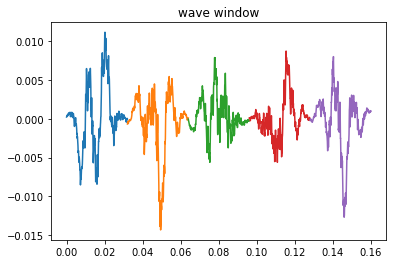

<Figure size 1296x360 with 0 Axes>

In [15]:
import librosa.display
import matplotlib.pyplot as plt

a1 = np.arange(512)
for i in range(5): ##range(5)，5個迭代，可以更改到200
    a2 = a1 + 512*i

    plt.plot(a2/16000,ans[i])
plt.title('wave window')
plt.figure(figsize = (18,5))

In [16]:
energy = abs(ans)

<Figure size 1296x360 with 0 Axes>

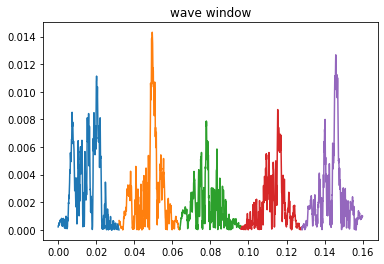

<Figure size 1296x360 with 0 Axes>

In [17]:
for i in range(5): ##range(5)，5個迭代，可以更改到200
    a2 = a1 + 512*i

    plt.plot(a2/16000,energy[i])
plt.title('wave window')
plt.figure(figsize = (18,5))

In [18]:
def sgn(a):
    if a > 0:
        return 1
    else:
        return -1

def ZCR( wavedata , framesize):
    frame_num = len(wavedata)
    zcr = np.zeros((frame_num,1))
    for i in range(frame_num):
        for j in range(1,512):
            if abs(sgn(wavedata[i][j])-sgn(wavedata[i][j-1])) > 0:
                zcr[i] += 1
        zcr[i] /= 512
    return zcr

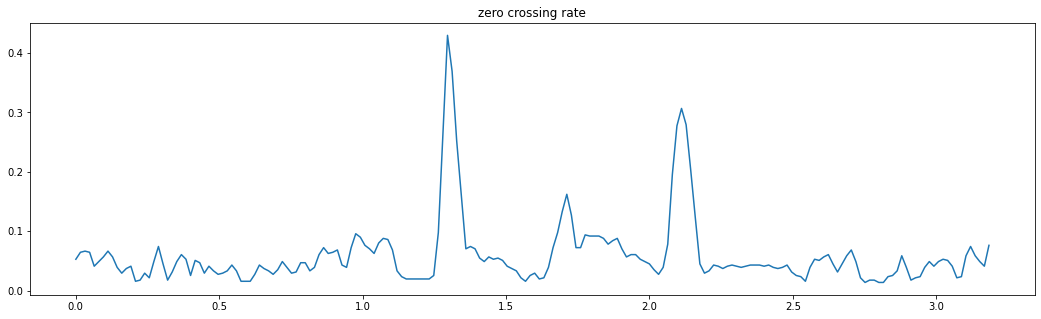

In [19]:
zcr = ZCR(ans , 512 )
a1 = np.arange(200)
plt.figure(figsize = (18,5))
plt.title('zero crossing rate')
plt.plot(a1*256/16000,zcr)

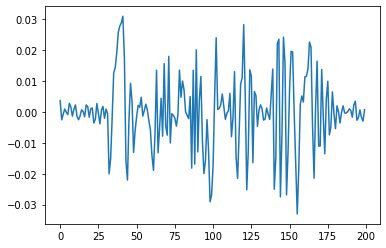

In [21]:
def actocorrelation(frame_number):
    actocorrelation = []
    for i in range(200):
        actocorrelation.append(np.sum(ans[frame_number]*ans[(frame_number+i)%200]))
    return actocorrelation


plt.plot(actocorrelation(199))

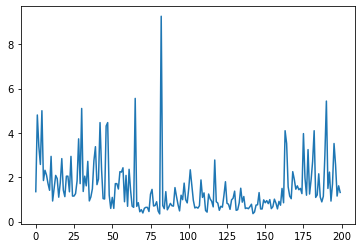

In [37]:
def pitch(frame_number):
    temp = []
    time = []
    pitch = 0
    temp = actocorrelation(frame_number)
    for i in range(1,199):
        if temp[i] > temp[i-1] and temp[i] > temp[i+1]:
            time.append((temp[i],i))
    time.sort(reverse = True)
    for i in range(1,5):
        pitch = abs(time[i][1]-time[i-1][1])+pitch
    pitch = pitch /4
    pitch = pitch *256 /16000
    return 1/pitch

pitch2 = []
for frame_number in range(200):
    pitch2.append(pitch(frame_number))
plt.plot(pitch2)

In [38]:
n = 10
average = []
for i in range(n):
    average.append(np.sum(abs(ans[i]) )/512)
max = np.max(average)
min = np.min(average)
I1 = 0.03 * (max - min) + min
I2 = 4 * min
ITL = np.min((I1,I2))
ITU = 5 * ITL
I1,I2

(0.001309542537046117, 0.00504743512263402)

In [39]:
IZC1 = []
for i in range(n):
    IZC1.append(zcr[i])
IZC = np.sum(IZC1) / n
std = np.std(IZC1)

In [40]:
IZCT = np.min((25,IZC + 2*std))
ITL,ITU,IZCT

(0.001309542537046117, 0.006547712685230585, 0.07497927392980644)

In [56]:
N1 = None
for i in range(n,200):
    start = sum(abs(ans[i]))/512
    if N1 != None:
        if start < ITL:
            N1 = None
        if start > ITU:
            break
    if N1 == None and start > ITL:
        N1 = i
s = 0
for i in range(N1,np.maximum(N1-25,0),-1):
    if zcr[i] >= IZCT:
        s+=1
        a = i
if s>=3:
    N1 = a
N1 = N1 * 256 / 16000
N1

0.16

In [53]:
N2 = None
for i in range(199,n-1,-1):
    start = sum(abs(ans[i]))/512
    if N2 != None:
        if start < ITL:
            N2 = None
        if start > ITU:
            break
    if N2 == None and start > ITL:
        N2 = i
N2 = N2 * 256 / 16000

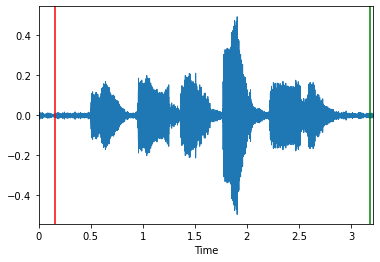

In [54]:
librosa.display.waveplot(y, sr)
plt.axvline(N1,color = 'r')
plt.axvline(N2,color = 'g')